<a href="https://colab.research.google.com/github/ashwinvaswani/Music-from-EEG/blob/master/code/notebooks/Music_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U mne


     |████████████████████████████████| 6.4MB 2.9MB/s 


In [2]:
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P01-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P04-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P05-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P06-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P07-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P09-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P11-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P12-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P13-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P14-raw.fif

--2020-02-15 09:08:57--  http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P01-raw.fif
Resolving www.ling.uni-potsdam.de (www.ling.uni-potsdam.de)... 141.89.97.24
Connecting to www.ling.uni-potsdam.de (www.ling.uni-potsdam.de)|141.89.97.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683990507 (652M)
Saving to: ‘P01-raw.fif’

P01-raw.fif         100%[===================>] 652.30M  20.8MB/s    in 33s     

2020-02-15 09:09:31 (19.5 MB/s) - ‘P01-raw.fif’ saved [683990507/683990507]

--2020-02-15 09:09:33--  http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P04-raw.fif
Resolving www.ling.uni-potsdam.de (www.ling.uni-potsdam.de)... 141.89.97.24
Connecting to www.ling.uni-potsdam.de (www.ling.uni-potsdam.de)|141.89.97.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684505792 (653M)
Saving to: ‘P04-raw.fif’

P04-raw.fif         100%[===================>] 652.79M  20.7MB/s    in 1m 45s  

2020-02-15 09:11:19 (6.19 MB/s) - ‘P0

In [0]:
import mne
import numpy as np
import matplotlib.pyplot as plt

#VISUALIZATIONS

In [4]:
fname = "P01-raw.fif"
raw = mne.io.read_raw_fif(fname)

Opening raw data file P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.


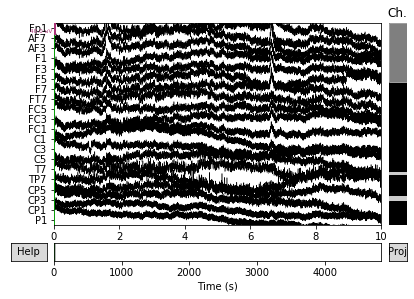

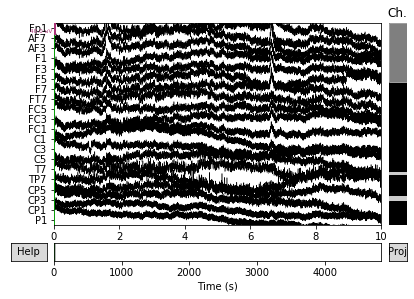

In [5]:
#Plot the raw data

raw.plot()

In [6]:
raw.crop(tmax=60).load_data()

Reading 0 ... 30720  =      0.000 ...    60.000 secs...


<Raw  |  P01-raw.fif, n_channels x n_times : 69 x 30721 (60.0 sec), ~16.3 MB, data loaded>

In [7]:
print(raw)

<Raw  |  P01-raw.fif, n_channels x n_times : 69 x 30721 (60.0 sec), ~16.3 MB, data loaded>


In [0]:
channels = raw.ch_names

In [9]:
raw.info['bads'] #Bad channels

['P8', 'P10', 'T8']

In [10]:
raw.info

<Info | 18 non-empty fields
    bads : list | P8, P10, T8
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, ...
    chs : list | 69 items (EEG: 64, EOG: 4, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dig : Digitization | 0 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 104.0 Hz
    meas_date : tuple | 2015-01-28 17:39:57 GMT
    meas_id : dict | 4 items
    nchan : int | 69
    proc_history : list | 0 items
    projs : list | Average EEG reference: off
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dev_head_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : 

(69, 0)
(0,)


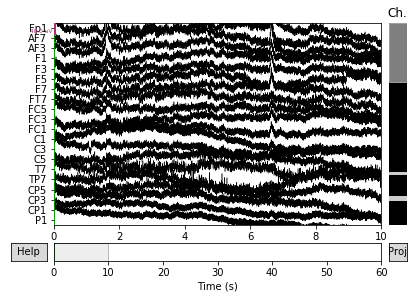

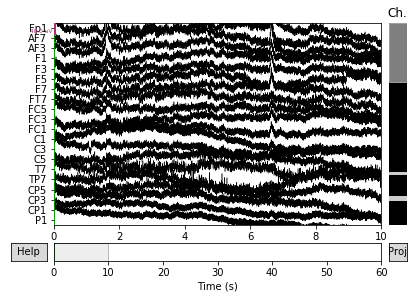

In [11]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:20:3, start:stop]  # access underlying data
raw.plot()

In [12]:
raw.info['sfreq'] #Sampling frequency

512.0

In [13]:
raw.time_as_index([20,30,40]) #Show index of samples at given time

array([10240, 15360, 20480])

In [14]:
raw.set_eeg_reference()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Removing existing average EEG reference projection.


<Raw  |  P01-raw.fif, n_channels x n_times : 69 x 30721 (60.0 sec), ~16.3 MB, data loaded>

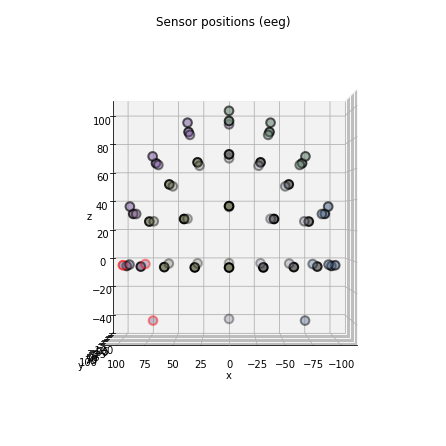

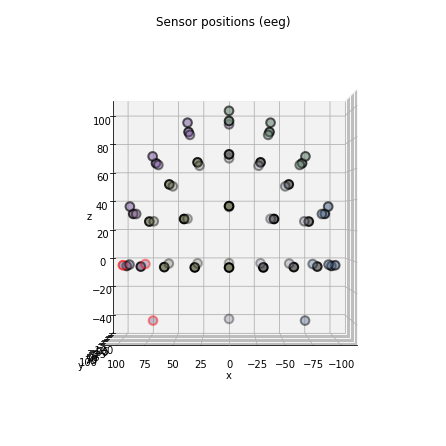

In [15]:
raw.plot_sensors(kind='3d', ch_type='eeg', ch_groups='position')

Effective window size : 4.000 (s)


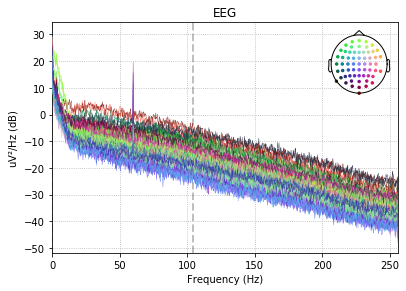

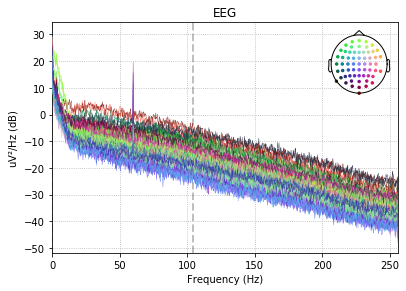

In [16]:
#Plot power-spectra

raw.plot_psd()

#Clustering

In [0]:
import pandas as pd

In [0]:
#df = pd.DataFrame(columns = ['band', 'val'])
#df['band'] = eeg_bands.keys()
#df['val'] = [eeg_band_fft[band] for band in eeg_bands]
#ax = df.plot.bar(x='band', y='val', legend=False)
#ax.set_xlabel("EEG band")
#ax.set_ylabel("Mean band Amplitude")

In [0]:
def extract_alphas_all_channels(eeg_data):
    
    fs = 512 #Sampling Frequency
    
    eeg_bands = {'Delta':(0,4),
             'Theta':(4,8),
             'Alpha':(8,12),
             'Beta':(12,30),
             'Gamma':(30,45)}
    overall_ans = dict()
    for i in range(69):

        
        fft_vals = np.absolute(np.fft.rfft(eeg_data[i]))
        fft_freq = np.fft.rfftfreq(len(eeg_data[i]), 1.0/fs)

        eeg_band_fft = dict()
        actual_band_fft = dict()

        for band in eeg_bands:
            freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
            actual_band_fft[band] = fft_vals[freq_ix]
            eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
        overall_ans[i] = eeg_band_fft

   
    return overall_ans




In [0]:
def make_into_vector_alpha(inp):
    ans = np.zeros(69)

    for i in range(69):
        ans[i] = inp[i]['Alpha']

    return ans

In [22]:
raw2 = mne.io.read_raw_fif(fname)

Opening raw data file P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.


In [23]:
#raw.set_eeg_reference()
eeg_data = raw2[:][0]
eeg_data.shape

(69, 2478166)

In [0]:
raw_lis = []
fname = ["P01-raw.fif", "P04-raw.fif","P05-raw.fif","P06-raw.fif","P07-raw.fif","P09-raw.fif","P11-raw.fif","P12-raw.fif","P13-raw.fif","P14-raw.fif"]

In [25]:
for i in fname:
    test = mne.io.read_raw_fif(i)
    raw_lis.append(test)

Opening raw data file P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Opening raw data file P04-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2480032 =      0.000 ...  4843.812 secs
Ready.
Opening raw data file P05-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2521101 =      0.000 ...  4924.025 secs
Ready.
Opening raw data file P06-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2433033 =      0.000 ...  4752.018 secs
Ready.
Opening raw data file P07-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2520436 =      0.000 .

In [0]:
ans_alpha_waves_list = []
for raw in raw_lis:
    eeg_data = raw[:][0]
    temp = make_into_vector_alpha(extract_alphas_all_channels(eeg_data))
    ans_alpha_waves_list.append(temp)

In [27]:
len(ans_alpha_waves_list)

10

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [0]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(ans_alpha_waves_list)

In [0]:
X = np.asarray(ans_alpha_waves_list)

In [53]:
X.shape

(10, 69)

In [30]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [0]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,7) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

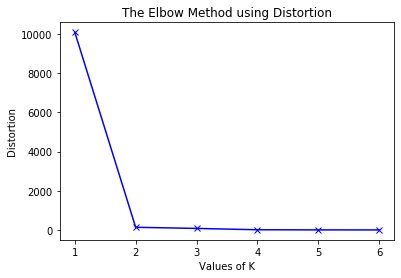

In [52]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

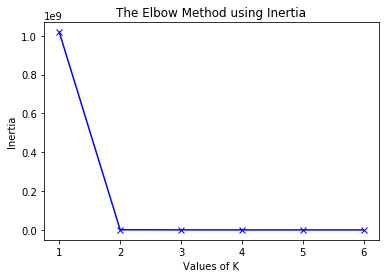

In [43]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [0]:
kmeans = KMeans(n_clusters=2, random_state=0,init='k-means++',max_iter=300,n_init=10)
y_kmeans = kmeans.fit_predict(X)

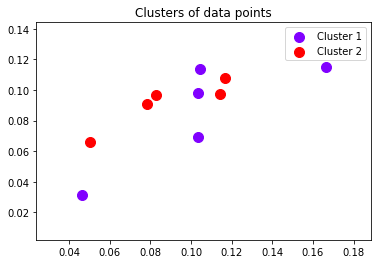

In [51]:
#Visualising clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, color = colors[0], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, color = colors[19], label = 'Cluster 2')

plt.title('Clusters of data points')
plt.legend()
plt.show()